In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
!pip install community

In [2]:
import community as community
from sklearn.cluster import SpectralClustering

In [3]:
from networkx.algorithms import community as nx_comm

In [4]:
veri = pd.read_excel("C:/Users/user/OneDrive/Masaüstü/Metehan dersler/4. SINIF/2.DÖNEM/AĞ ANALİZİ/liste.xlsx")

In [5]:
names = veri.iloc[:,1:3]
names

,Ad,Soyad
0,AÇELYA,BALKAN
1,ADİL,ALIŞ
2,AHMET ENSAR,ALTUNAY
3,AHMET VEYSEL,İLHAN
4,ALİ RIZA,YÜKSEL
5,AYBÜKE,GÜRGEN
6,AYLİN,AYDIN
7,AZAD,İRTEGÜN
8,BARAN,TOKER
9,BUĞRA,YÖNTEM


In [6]:
matrix = veri.iloc[:,3:]
matrix

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0,0,0,1,0,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
4,1,1,1,1,0,1,1,1,1,1,...,1,1,1,0,0,1,0,0,0,0
5,1,0,1,0,1,0,0,1,0,0,...,1,0,1,1,1,0,1,0,0,0
6,1,0,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
8,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


In [7]:
# Bir pandas veri çerçevesinden networkx grafiği oluşturulması
G = nx.from_pandas_adjacency(matrix, create_using=nx.Graph)

In [8]:
# Louvain yöntemi kullanarak bölümlemenin hesaplanması
partition = community.best_partition(G)

In [8]:
# Görselleştirme için düğüm pozisyonları
pos = nx.spring_layout(G)

In [9]:
# Her bir kümenin merkezlerinin hesaplanması
centers = {}
for node, cluster in partition.items():
    if cluster not in centers:
        centers[cluster] = np.array([0.0, 0.0])
    centers[cluster] += np.array(pos[node])
for cluster in centers:
    centers[cluster] /= len([n for n in partition if partition[n] == cluster])

In [10]:
# Her düğüm için küme merkezlerine dayalı olarak yeni konumlarının hesaplanması
new_pos = {}
for node, cluster in partition.items():
    new_pos[node] = centers[cluster] + np.random.normal(scale=0.1, size=2)

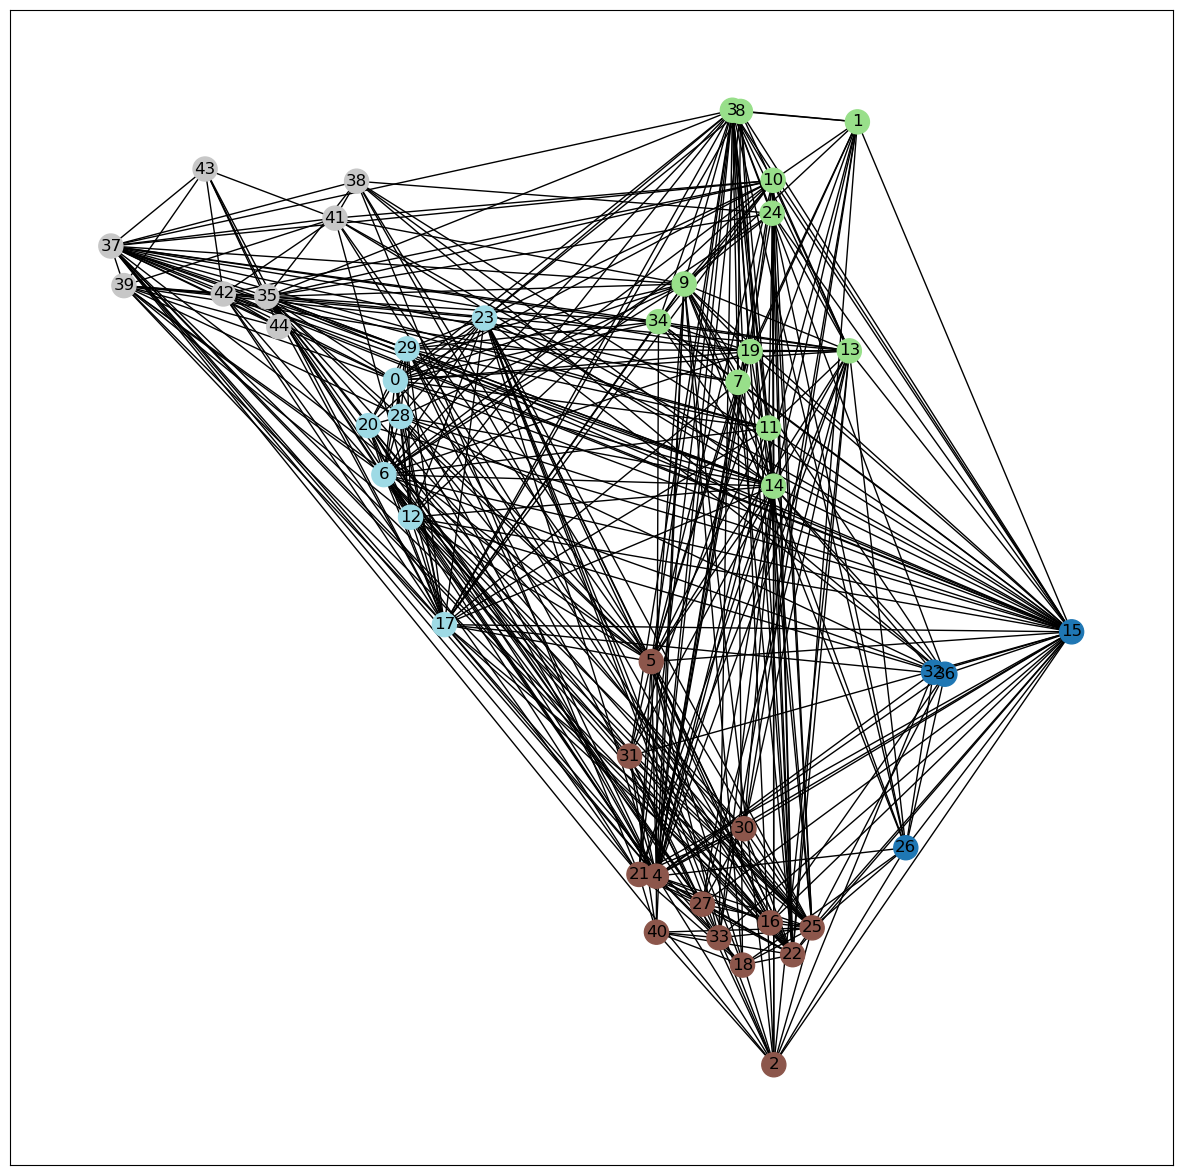

In [13]:
# Yeni konumları kullanarak grafiğin çizilmesi
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw_networkx(G, pos=new_pos, node_color=[partition[n] for n in G.nodes()], cmap='tab20', with_labels=True, ax=ax)
plt.savefig("kümeleme.png", format="png")

In [11]:
#Modülaritenin hesaplanması
modularity = community.modularity(partition, G)

In [12]:
modularity

0.1461900112561489